# 使用Cifar10練習影像分類基本功

In [1]:
#匯入函式庫，數值矩陣計算numpy，以及畫圖用的matplotlib
import numpy as np
import matplotlib.pyplot as plt

#匯入
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [2]:
#匯入tensorflow的函式庫，以及cifar10
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [3]:
#註：呼叫這些功能的寫法有兩種，以cifar10為例
#一、直接打一整串：tf.keras.datasets.cifar10.load_data()
#二、在一開始的地方使用from tensorflow.keras.datasets import cifar10，以後只要用cifar10.load_data()即可

## 讀取與檢視資料

In [4]:
#使用cifar10的資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

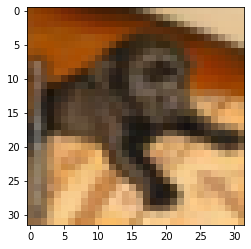

In [6]:
plt.imshow(X_train[56])

In [7]:
# 0 : airplain (飛機)
# 1 : automobile (汽車)
# 2 : bird (鳥)
# 3 : cat (貓)
# 4 : deer (鹿)
# 5 : dog (狗)
# 6 : frog (青蛙)
# 7 : horse (馬)
# 8 : ship (船)
# 9 : truck (卡車)

## 影像前處理

In [8]:
#對影像作正規化
x_train = X_train.astype('float32')/255
x_test = X_test.astype('float32')/255

In [9]:
#對類別資料作One-hot encoding
y_train = tf.keras.utils.to_categorical(Y_train)
y_test = tf.keras.utils.to_categorical(Y_test)

## 建立AI模型

In [10]:
#撰寫模型
input_layer=tf.keras.layers.Input(shape=(32,32,3))

x=tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')(input_layer)
x=tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x=tf.keras.layers.MaxPool2D()(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(32, activation='relu')(x)

output_layer=tf.keras.layers.Dense(10, activation='softmax')(x)

In [11]:
model=tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                401440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330   

## 開始訓練

In [12]:
#告訴AI學習的方式
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])


In [13]:
#開始訓練，順便把訓練過程存到model_history，方便後續畫圖
model_history=model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 7s 3ms/step - loss: 1.4316 - categorical_accuracy: 0.4838 - val_loss: 1.1494 - val_categorical_accuracy: 0.6010
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.0415 - categorical_accuracy: 0.6367 - val_loss: 0.9920 - val_categorical_accuracy: 0.6565
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9083 - categorical_accuracy: 0.6852 - val_loss: 0.9622 - val_categorical_accuracy: 0.6654
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.8177 - categorical_accuracy: 0.7174 - val_loss: 0.9607 - val_categorical_accuracy: 0.6722
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.7410 - categorical_accuracy: 0.7441 - val_loss: 1.0101 - val_categorical_accuracy: 0.6605
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6711 - categorical_accuracy: 0.7679 - val_loss: 0.9780 - val_categorical_accuracy:

## 畫圖

In [14]:
model_history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

In [15]:
training_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

training_acc = model_history.history['categorical_accuracy']
val_acc = model_history.history['val_categorical_accuracy']

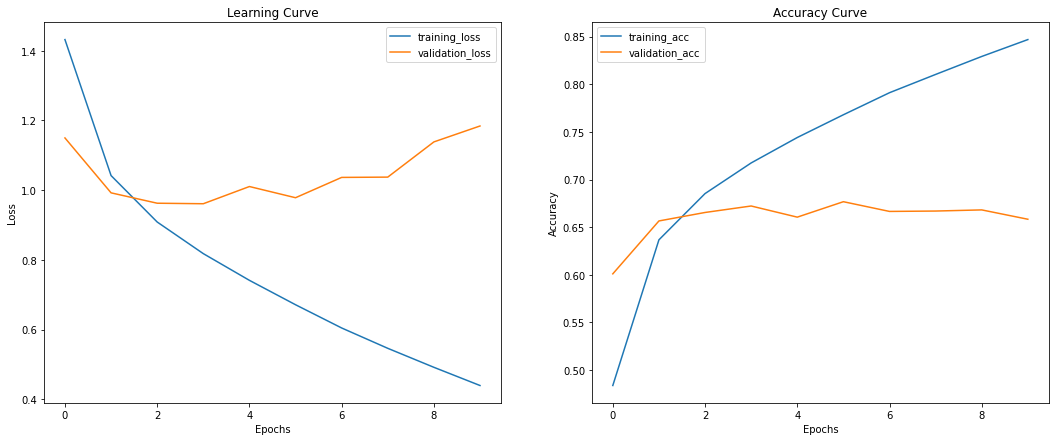

In [16]:
#畫圖
plt.figure(figsize=(18, 7))
plt.subplot(121)
plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')

plt.subplot(122)
plt.plot(training_acc, label="training_acc")
plt.plot(val_acc, label="validation_acc")
plt.legend(loc='upper left')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend(loc='best')

plt.show()

## 作預測

In [17]:
#使用AI模型作預測
pred=model.predict(x_test)

In [18]:
#將預測的機率轉換成類別
ans=np.argmax(pred, axis=-1)

In [19]:
#畫出混淆矩陣
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(Y_test, ans)
print(cf_matrix)

[[707  36  53  21  21  10  16  27  66  43]
 [ 27 825   7   8   3  11   7  12  20  80]
 [ 74  16 471  54  97 102  82  71  19  14]
 [ 27  18  66 383  77 232  81  83  14  19]
 [ 29   7  88  52 552  46  73 133  13   7]
 [ 14   6  44 116  40 642  27  92  11   8]
 [  8  13  43  58  46  49 750  15   8  10]
 [ 19   4  28  19  46  69   7 791   3  14]
 [ 89  59  17  14   7  13   8  11 750  32]
 [ 38 151  15  12   6  11   2  31  22 712]]


<AxesSubplot:>

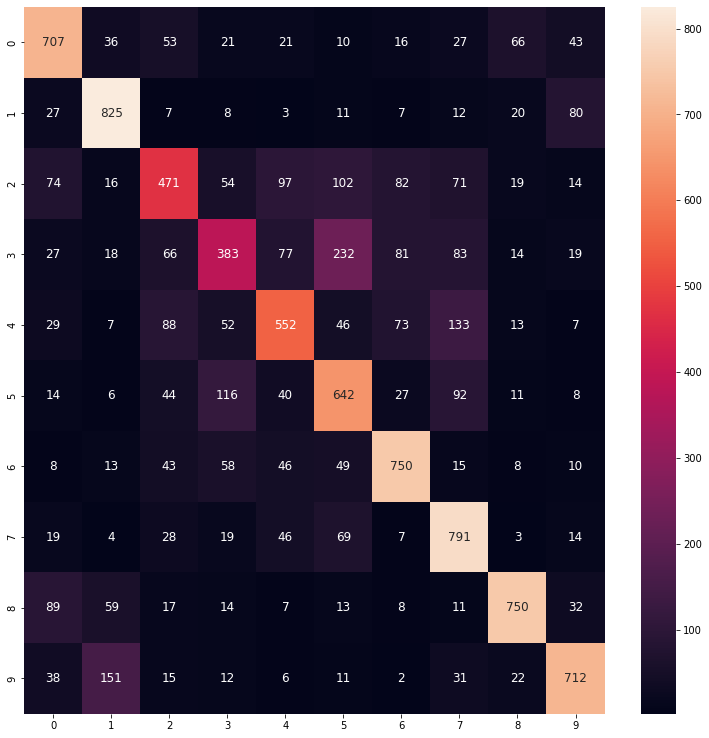

In [20]:
#對混淆矩陣畫圖
import seaborn as sns
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(cf_matrix, fmt='g', annot=True, annot_kws={"size":12})

In [21]:
#計算統計指標
from sklearn.metrics import classification_report
report = classification_report(Y_test, ans)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1000
           1       0.73      0.82      0.77      1000
           2       0.57      0.47      0.51      1000
           3       0.52      0.38      0.44      1000
           4       0.62      0.55      0.58      1000
           5       0.54      0.64      0.59      1000
           6       0.71      0.75      0.73      1000
           7       0.62      0.79      0.70      1000
           8       0.81      0.75      0.78      1000
           9       0.76      0.71      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.65     10000
weighted avg       0.66      0.66      0.65     10000

